# INDIVIDUAL TASK #2

In [1458]:
import numpy as np
from scipy import stats
from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt

## PART 1

In [1459]:
X = np.array([[4, 2.9], [2.5, 1], [3.5, 4], [2, 2.1]])
print(X)

[[4.  2.9]
 [2.5 1. ]
 [3.5 4. ]
 [2.  2.1]]


In [1460]:
# Рассчитайте ядерную матрицу
K = squareform(pdist(X, 'sqeuclidean'))
print(K)

[[ 0.    5.86  1.46  4.64]
 [ 5.86  0.   10.    1.46]
 [ 1.46 10.    0.    5.86]
 [ 4.64  1.46  5.86  0.  ]]


## PART 2

In [1461]:
D = np.array([[8, -20],
              [0, -1],
              [10, -19],
              [10, -20],
              [2, 0]])
print(D)

[[  8 -20]
 [  0  -1]
 [ 10 -19]
 [ 10 -20]
 [  2   0]]


In [1462]:
# Рассчитайте среднее
print(np.mean(D, axis=0))

[  6. -12.]


In [1463]:
# и ковариационную матрицу для матрицы D
print(np.cov(D.T))

[[ 22.  -47.5]
 [-47.5 110.5]]


In [1464]:
# Рассчитайте собственные числа для матрицы
w, v = np.linalg.eigh(np.cov(D.T))
w

array([  1.33226359, 131.16773641])

In [1465]:
# Какой “внутренний” размер данного набора данных?
D.shape[0]

5

In [1466]:
# Рассчитай первый главный компонент
pca_data = PCA(n_components=1).fit_transform(D)
print(pca_data[:, 0])

[-8.13363886 12.4804344  -8.01463621 -8.93159638 12.59943705]


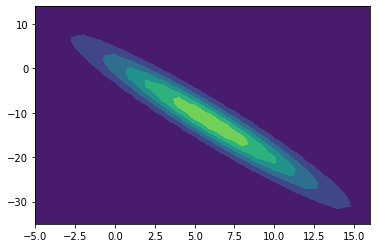

In [1467]:
#Если 𝛍 и  𝚺 сверху характеризуют нормальное распределение,
# из которого были сгенерированы точки, нарисуйте ориентацию /
# протяженность 2-мерной функции нормальной плотности.
rw = stats.multivariate_normal(mean=np.mean(D, axis=0), cov=np.cov(D.T), allow_singular=True)
x, y = np.mgrid[-5:17:1, -35:15:1]
pos = np.dstack([x, y])

plt.contourf(x, y, rw.pdf(pos))

## PART 3

In [1468]:
# Для данных и ядра из первого задания найдите первую
# главную компоненту при нелинейном преобразовании для заданного ядра
kcpa_data = KernelPCA(n_components=1, kernel='precomputed').fit(K).transform(X.T)
kcpa_data[:, 0]

array([24196695.01682318, 24196695.01682317])